## Verification and Bias testing 
Choose one of the PREDICTANDS in the first cell and run entire cells to view the results.

*y_pred*: 25 member Ensemble Downscaled tasmean --> the 25 members are further feature reduced to one variable for verification and bias testing purpose

*y_true*: CERRA Tasmean for the given period

In [1]:
# define the predictand
PREDICTAND = 'tasmean'  # 'tasmin' or 'tasmax' or 'tasmean'
year = 2020

In [2]:
# mapping from predictands to variable names
NAMES = {'tasmin': 'minimum temperature', 'tasmax': 'maximum temperature', 'tasmean': 'mean temperature'}
# dataset names mapping
PRED = 'LGBM SEAS5 $T_{\mathrm{mean \ daily}}$'
TRUE = 'CERRA $T_{\mathrm{mean \ daily}}$'

### Imports

In [3]:
# builtins
import datetime
import warnings
import calendar

# externals
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats
from IPython.display import Image
from sklearn.metrics import r2_score

### Load datasets

In [4]:
if year == 2016:

    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_hindcast.nc")    

else:
    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_forecast.nc")    

    y_pred = y_pred.rename({'member': "number"})


In [5]:
y_pred = y_pred - 273.15

In [6]:
# CERRA Data
if PREDICTAND == 'tasmin':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmin/CERRA_2m_tasmin_1985_2020.nc")
    
if PREDICTAND == 'tasmax':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmax/CERRA_2m_tasmax_1985_2020.nc")
    
if PREDICTAND == 'tasmean':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmean/CERRA_2m_temperature_1985_2020.nc")    


y_true

y_true = y_true.rename({'lon': "x"})
y_true = y_true.rename({'lat': "y"})
y_true

<xarray.Dataset> Size: 813MB
Dimensions:            (x: 161, y: 96, time: 13149)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 105kB 1985-01-01 ... 2020-12-31
Data variables:
    t2m                (time, y, x) float32 813MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [7]:
y_pred

<xarray.Dataset> Size: 9GB
Dimensions:  (time: 1429, y: 96, x: 161, number: 51)
Coordinates:
  * time     (time) datetime64[ns] 11kB 2017-02-01 2017-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
  * number   (number) int64 408B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
Data variables:
    tasmean  (number, time, y, x) float64 9GB 6.854 5.888 ... -8.355 -8.245

In [8]:
tasmean = y_pred[PREDICTAND].median(dim='number')
y_pred = tasmean.to_dataset(name=PREDICTAND)


In [9]:
import xarray as xr
hind = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_hindcast.nc")
hind
hind = hind - 273.15
hind = hind[PREDICTAND].median(dim='number')
hind = hind.to_dataset(name=PREDICTAND)

y_pred = xr.concat([hind, y_pred], dim='time')
y_pred


<xarray.Dataset> Size: 222MB
Dimensions:  (time: 1795, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 14kB 2016-02-01 2016-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x) float64 222MB 5.7 5.284 5.835 ... -2.039 -2.181 -2.186

In [10]:
# subset to time period covered by predictions
y_true = y_true.sel(time=y_pred.time)
y_true = y_true.rename({'t2m': PREDICTAND})
y_true = y_true - 273.15

In [11]:
y_pred

<xarray.Dataset> Size: 222MB
Dimensions:  (time: 1795, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 14kB 2016-02-01 2016-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x) float64 222MB 5.7 5.284 5.835 ... -2.039 -2.181 -2.186

In [12]:
def get_time_range(dataset):
    time_coord = dataset.time

    # Get the starting and ending years
    start_year = time_coord.min().dt.year.item()
    end_year = time_coord.max().dt.year.item()

    return str(start_year), str(end_year)

start_year, end_year = get_time_range(y_pred)
print("Starting year:", start_year)
print("Ending year:", end_year)


Starting year: 2016
Ending year: 2020


In [13]:
# align datasets and mask missing values in Insitu:CERRA predictions
y_true, y_pred = xr.align(y_true[PREDICTAND], y_pred[PREDICTAND], join='override')

In [14]:
y_true

<xarray.DataArray 'tasmean' (time: 1795, y: 96, x: 161)> Size: 111MB
array([[[13.332031  , 13.155853  , 13.173889  , ..., 14.601959  ,
         14.769684  , 14.815216  ],
        [12.803009  , 12.633759  , 13.010864  , ..., 14.442078  ,
         14.594421  , 14.234802  ],
        [12.55719   , 12.670898  , 12.9935    , ..., 14.115356  ,
         13.569855  , 13.2482605 ],
        ...,
        [ 8.907623  ,  8.857544  ,  8.781403  , ...,  6.00412   ,
          6.1945496 ,  6.5510864 ],
        [ 8.923248  ,  8.952301  ,  8.816315  , ...,  6.927002  ,
          7.1152954 ,  7.2220764 ],
        [ 9.169678  ,  9.234161  ,  9.026245  , ...,  7.326782  ,
          7.235443  ,  7.062958  ]],

       [[ 9.733276  ,  9.647156  ,  9.518616  , ..., 13.416504  ,
         13.765808  , 13.781799  ],
        [ 9.657898  ,  9.382263  ,  9.417267  , ..., 12.304108  ,
         12.439575  , 11.629486  ],
        [ 9.689178  ,  9.606567  ,  9.290558  , ..., 11.810394  ,
         10.808746  , 10.554657  ],
...
        [ 1.1291199 ,  1.0311584 ,  0.8732605 , ...,  2.4204712 ,
          2.5972595 ,  3.0231323 ],
        [ 1.0886536 ,  1.0751648 ,  0.87301636, ...,  3.6161194 ,
          3.978302  ,  4.1756897 ],
        [ 1.3735657 ,  1.4538879 ,  1.197876  , ...,  4.541809  ,
          4.575836  ,  4.458832  ]],

       [[ 2.324646  ,  2.1434326 ,  1.9787903 , ..., 13.167084  ,
         13.665649  , 13.616547  ],
        [ 1.9729614 ,  1.5584412 ,  1.6370544 , ..., 12.347626  ,
         12.814331  , 12.362122  ],
        [ 1.8825989 ,  1.4822998 ,  1.3814087 , ..., 12.472656  ,
         11.874481  , 11.518127  ],
        ...,
        [ 1.0103455 ,  0.9259949 ,  0.81155396, ..., -0.05187988,
          0.10299683,  0.34005737],
        [ 1.1213074 ,  1.039917  ,  0.84017944, ...,  0.5721741 ,
          0.7281494 ,  0.7475281 ],
        [ 1.4971008 ,  1.4839172 ,  1.2037659 , ...,  0.766449  ,
          0.7253418 ,  0.5571594 ]]], dtype=float32)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 14kB 2016-02-01 ... 2020-12-30

In [15]:
y_pred

<xarray.DataArray 'tasmean' (time: 1795, y: 96, x: 161)> Size: 222MB
array([[[ 5.69959376,  5.28356669,  5.83521976, ...,  9.8268366 ,
          9.74954496,  9.78216903],
        [ 5.05254538,  5.20002163,  4.27249832, ...,  8.64321618,
          8.55547701,  8.42878828],
        [ 5.13270531,  4.49267804,  4.68677441, ...,  7.89748246,
          6.66669952,  6.01356536],
        ...,
        [ 2.20999024,  2.16003982,  2.15193625, ...,  0.91889834,
          0.5113389 ,  1.22810008],
        [ 2.06803474,  2.36250972,  2.2104047 , ...,  0.63641992,
          0.46424827,  1.14289451],
        [ 2.31699775,  2.19913144,  2.50389483, ...,  0.81667562,
          0.5921106 ,  0.99880576]],

       [[ 5.02731057,  4.9973376 ,  5.10948143, ...,  9.31409395,
          9.18776177,  9.27114201],
        [ 5.04443214,  4.12930085,  4.75221394, ...,  8.02219312,
          8.07833606,  7.3806404 ],
        [ 4.79671003,  4.39225838,  4.42655827, ...,  7.45302267,
          6.00328163,  5.6799911 ],
...
        [ 0.82097048,  0.81308178,  0.92872838, ..., -2.49473796,
         -2.60454018, -1.82569671],
        [ 1.09385614,  0.80198058,  0.81113225, ..., -1.95599345,
         -1.79919431, -1.43451124],
        [ 0.97008717,  1.32727182,  1.24280033, ..., -1.1800893 ,
         -1.19889642, -1.5316565 ]],

       [[ 4.78866395,  4.32387866,  4.10878722, ...,  9.62376798,
         10.19673288,  9.98997172],
        [ 4.49849501,  3.7456317 ,  3.63379244, ...,  8.67296178,
          8.62112894,  7.90575802],
        [ 4.18007087,  3.80337189,  3.35118379, ...,  8.06497684,
          6.66951766,  6.33366557],
        ...,
        [ 1.08546795,  1.38439467,  1.09462953, ..., -2.70878861,
         -2.64830158, -2.282044  ],
        [ 1.18042664,  1.45261309,  1.31291114, ..., -1.96037978,
         -1.99961927, -1.93841134],
        [ 1.52654194,  1.7232239 ,  1.46529819, ..., -2.03911981,
         -2.18089285, -2.18598247]]])
Coordinates:
  * time     (time) datetime64[ns] 14kB 2016-02-01 2016-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82

In [16]:
# calculate monthly means
y_pred_mm = y_pred.groupby('time.month').mean(dim=('time'))
y_true_mm = y_true.groupby('time.month').mean(dim=('time'))

In [17]:
# calculate mean annual cycle
y_pred_ac = y_pred_mm.mean(dim=('x', 'y'))
y_true_ac = y_true_mm.mean(dim=('x', 'y'))

In [18]:
# compute daily anomalies
def anomalies(ds, timescale='time.dayofyear', standard=False):
        # group dataset by time scale
        groups = ds.groupby(timescale).groups

        # compute anomalies over time
        anomalies = {}
        for time, time_scale in groups.items():
            with warnings.catch_warnings():
                warnings.simplefilter('ignore', category=RuntimeWarning)
                # anomaly = (x(t) - mean(x, t))
                anomalies[time] = (ds.isel(time=time_scale) -
                                   ds.isel(time=time_scale).mean(dim='time'))

                # standardized anomaly = (x(t) - mean(x, t)) / std(x, t)
                if standard:
                    anomalies[time] /= ds.isel(time=time_scale).std(dim='time')

        # concatenate anomalies and sort chronologically
        anomalies = xr.concat(anomalies.values(), dim='time')
        anomalies = anomalies.sortby(anomalies.time)

        return anomalies

y_pred_anom = anomalies(y_pred, timescale='time.month')
y_true_anom = anomalies(y_true, timescale='time.month')

In [19]:
y_pred_anom

<xarray.DataArray 'tasmean' (time: 1795, y: 96, x: 161)> Size: 222MB
array([[[-3.08042184e-01, -4.00494778e-01,  4.15593944e-01, ...,
         -1.86026172e-01, -4.11010641e-01, -2.42363638e-01],
        [-5.74336255e-01,  3.89440724e-02, -8.11878585e-01, ...,
         -2.72773502e-01, -2.58228222e-01,  3.70336538e-01],
        [-2.65773087e-01, -6.36177260e-01, -3.07446405e-01, ...,
         -1.93676493e-01, -4.00644281e-01, -5.95137463e-01],
        ...,
        [ 4.00376559e-01,  3.24245025e-01,  3.39464626e-01, ...,
          1.53239106e+00,  9.53040464e-01,  1.43205262e+00],
        [ 2.01867014e-01,  4.65043661e-01,  4.34490300e-01, ...,
          5.45679976e-01,  2.44320350e-01,  7.28037702e-01],
        [ 2.54220108e-01,  7.25474512e-02,  5.63304198e-01, ...,
          3.58296511e-01,  2.06024351e-01,  6.34593830e-01]],

       [[-9.80325373e-01, -6.86723867e-01, -3.10144394e-01, ...,
         -6.98768820e-01, -9.72793839e-01, -7.53390660e-01],
        [-5.82449494e-01, -1.03177671e+00, -3.32162971e-01, ...,
         -8.93796567e-01, -7.35369164e-01, -6.77811340e-01],
        [-6.01768367e-01, -7.36596922e-01, -5.67662541e-01, ...,
         -6.38136284e-01, -1.06406217e+00, -9.28711731e-01],
...
        [-1.13597595e+00, -1.12115846e+00, -9.95345032e-01, ...,
         -1.96416203e+00, -2.22647861e+00, -1.72547052e+00],
        [-8.86698761e-01, -1.24324422e+00, -1.12353406e+00, ...,
         -2.04921068e+00, -2.08373277e+00, -1.86108840e+00],
        [-1.23640481e+00, -9.55033574e-01, -8.79007198e-01, ...,
         -1.59792872e+00, -1.59569513e+00, -1.91008406e+00]],

       [[-1.14865668e+00, -1.27779742e+00, -1.20984948e+00, ...,
         -1.70921861e+00, -1.29370419e+00, -1.31211884e+00],
        [-1.03862404e+00, -1.29742057e+00, -1.33305780e+00, ...,
         -1.40331784e+00, -1.41250255e+00, -1.24497327e+00],
        [-1.08641121e+00, -1.25384353e+00, -1.55574621e+00, ...,
         -1.13144873e+00, -1.40774987e+00, -1.19998951e+00],
        ...,
        [-8.71478473e-01, -5.49845575e-01, -8.29443883e-01, ...,
         -2.17821268e+00, -2.27024001e+00, -2.18181782e+00],
        [-8.00128265e-01, -5.92611707e-01, -6.21755170e-01, ...,
         -2.05359701e+00, -2.28415773e+00, -2.36498850e+00],
        [-6.79950033e-01, -5.59081493e-01, -6.56509344e-01, ...,
         -2.45695923e+00, -2.57769156e+00, -2.56441002e+00]]])
Coordinates:
  * time     (time) datetime64[ns] 14kB 2016-02-01 2016-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82

In [20]:
y_true_anom

<xarray.DataArray 'tasmean' (time: 1795, y: 96, x: 161)> Size: 111MB
array([[[ 5.1689577 ,  5.291061  ,  5.528862  , ...,  3.4866543 ,
          3.3754444 ,  3.4582796 ],
        [ 4.994258  ,  5.267142  ,  5.750698  , ...,  3.9626598 ,
          3.930956  ,  4.051525  ],
        [ 4.88197   ,  5.373112  ,  5.8861537 , ...,  3.985345  ,
          3.9446964 ,  3.8213358 ],
        ...,
        [ 5.9485197 ,  5.9272003 ,  5.9336596 , ...,  4.9858646 ,
          4.961458  ,  4.928753  ],
        [ 5.9167852 ,  5.9279194 ,  5.915223  , ...,  4.92185   ,
          4.8077374 ,  4.709443  ],
        [ 5.913739  ,  5.898613  ,  5.8636613 , ...,  4.7044315 ,
          4.546777  ,  4.382077  ]],

       [[ 1.5702028 ,  1.7823634 ,  1.8735886 , ...,  2.301199  ,
          2.3715687 ,  2.4248629 ],
        [ 1.8491468 ,  2.0156465 ,  2.1571007 , ...,  1.8246899 ,
          1.7761097 ,  1.446209  ],
        [ 2.0139585 ,  2.3087811 ,  2.1832118 , ...,  1.6803827 ,
          1.183588  ,  1.1277323 ],
...
        [-1.9015479 , -1.9729681 , -2.0517988 , ...,  1.4174811 ,
          1.428749  ,  1.5404061 ],
        [-2.0488725 , -2.0790403 , -2.1661532 , ...,  1.7720289 ,
          1.9077058 ,  1.9520712 ],
        [-2.0346532 , -2.0330744 , -2.127022  , ...,  2.1755996 ,
          2.1677225 ,  2.0716476 ]],

       [[-5.034542  , -4.907972  , -4.775663  , ...,  1.2931948 ,
          1.3790646 ,  1.4612522 ],
        [-4.884936  , -4.8854017 , -4.6441765 , ...,  1.4968748 ,
          1.7260704 ,  2.1389532 ],
        [-4.692423  , -4.820449  , -4.750593  , ...,  2.168171  ,
          2.4250946 ,  2.58922   ],
        ...,
        [-2.0203223 , -2.0781317 , -2.1135054 , ..., -1.05487   ,
         -1.0655137 , -1.1426688 ],
        [-2.0162187 , -2.114288  , -2.19899   , ..., -1.2719164 ,
         -1.3424468 , -1.4760904 ],
        [-1.911118  , -2.003045  , -2.1211321 , ..., -1.5997605 ,
         -1.6827719 , -1.8300247 ]]], dtype=float32)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B 2.0
  * time               (time) datetime64[ns] 14kB 2016-02-01 ... 2020-12-30

### Coefficient of determination

In [21]:
# get predicted and observed daily anomalies
y_pred_av = y_pred_anom.values.flatten()
y_true_av = y_true_anom.values.flatten()

# apply mask of valid pixels
mask = (~np.isnan(y_pred_av) & ~np.isnan(y_true_av))
y_pred_av = y_pred_av[mask]
y_true_av = y_true_av[mask]

# get predicted and observed monthly means
y_pred_mv = y_pred_mm.values.flatten()
y_true_mv = y_true_mm.values.flatten()

# apply mask of valid pixels
mask = (~np.isnan(y_pred_mv) & ~np.isnan(y_true_mv))
y_pred_mv = y_pred_mv[mask]
y_true_mv = y_true_mv[mask]

# calculate coefficient of determination on monthly means
r2_mm = r2_score(y_true_mv, y_pred_mv)
print('R2 on monthly means: {:.2f}'.format(r2_mm))

# calculate coefficient of determination on daily anomalies
r2_anom = r2_score(y_true_av, y_pred_av)
print('R2 on daily anomalies: {:.2f}'.format(r2_anom))

R2 on monthly means: 0.96
R2 on daily anomalies: 0.03


### Coefficient of determination: Spatially

In [22]:
# iterate over the grid points
r2 = np.ones((2,  len(y_pred.y), len(y_pred.x)), dtype=np.float32) * np.nan
for i in range(len(y_pred.x)):
    for j in range(len(y_pred.y)):
        # get observed and predicted monthly mean temperature for current grid point
        point_true = y_true_mm.isel(x=i, y=j)
        point_pred = y_pred_mm.isel(x=i, y=j)

        # remove missing values
        mask = ((~np.isnan(point_true)) & (~np.isnan(point_pred)))
        point_true = point_true[mask].values
        point_pred = point_pred[mask].values
        if point_true.size < 1:
            continue
        
        # get anomalies for current grid point
        point_anom_true = y_true_anom.isel(x=i, y=j)
        point_anom_pred = y_pred_anom.isel(x=i, y=j)
        
        # remove missing values
        mask_anom = ((~np.isnan(point_anom_true)) & (~np.isnan(point_anom_pred)))
        point_anom_true = point_anom_true[mask_anom].values
        point_anom_pred = point_anom_pred[mask_anom].values

        # compute coefficient of determination
        r2[0, j, i] = r2_score(point_true, point_pred)
        r2[1, j, i] = r2_score(point_anom_true, point_anom_pred)

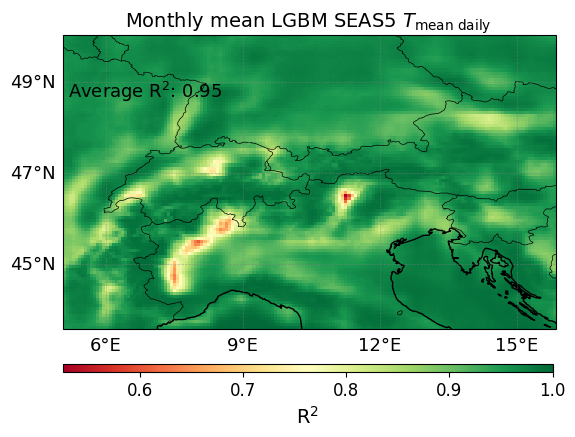

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.ticker as mticker

x_values = y_true.x.values
y_values = y_true.y.values
r22 = xr.DataArray(
    r2,
    dims=('number', 'y', 'x'),
    coords={'x': x_values, 'y': y_values}
)
# Set the CRS to EPSG 4326
r22.rio.set_crs("EPSG:4326", inplace=True)

# Plot each number separately
numbers = [0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), subplot_kw={'projection': ccrs.PlateCarree()})

cbar_axes = [None] * 2  # Create an empty list to store colorbar axes

for i, number in enumerate(numbers):
    ax = axes[i]
    
    # Select data for the current number
    ds_number = r22.sel(number=number)
    
    # Plot the data
    if i == 0:
        im = ds_number.plot(ax=ax, cmap='RdYlGn', vmin=ds_number.min().values, vmax=1, add_colorbar=False)
        cbar_axes[i] = fig.add_axes([0.125, 0.02, 0.35, 0.02])
        cbar = fig.colorbar(im, cax=cbar_axes[i], orientation='horizontal')
    elif i == 1:
        im = ds_number.plot(ax=ax, cmap='RdYlGn', vmin=ds_number.min().values, vmax=1, add_colorbar=False)
        cbar_axes[i] = fig.add_axes([0.55, 0.02, 0.35, 0.02])
        cbar = fig.colorbar(im, cax=cbar_axes[i], orientation='horizontal')
    
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='solid', edgecolor='black')
    
    # Add coastlines
    ax.coastlines()
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([6, 9, 12, 15])
    gl.ylocator = mticker.FixedLocator([45, 47, 49])
    gl.xlabel_style = {'size': 13}  # Adjust the font size as needed
    gl.ylabel_style = {'size': 13}

    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove y-axis ticks and labels
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    # Remove y-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticklabels([])
    
    # Set title
    if i == 0:
        ax.set_title('Monthly mean {} '.format(PRED), fontsize=14)
        ax.text(0.01, 0.85, 'Average R$^2$: {:.2f}'.format(np.nanmean(r2[0, :])), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')

    elif i == 1:
        ax.set_title('Daily mean {} Anomalies'.format(PRED), fontsize=14)
        ax.text(0.01, 0.85, 'Average R$^2$: {:.2f}'.format(np.nanmean(r2[1, :])), ha='left', va='top', transform=ax.transAxes, fontsize=12, color='black')



# Customize colorbars
cbar_axes[0].set_xlabel('R$^2$', fontsize=14)
#cbar_axes[1].set_xlabel('R$^2$', fontsize=14)
cbar_axes[0].xaxis.set_tick_params(labelsize=12)
#cbar_axes[1].xaxis.set_tick_params(labelsize=12)
fig.delaxes(axes[1])
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Adjust spacing between subplots
plt.show()


# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_r2_spatial_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

### Bias

Calculate yearly average bias over entire reference period:

In [24]:
# yearly average bias over reference period
y_pred_yearly_avg = y_pred.groupby('time.year').mean(dim='time')
y_true_yearly_avg = y_true.groupby('time.year').mean(dim='time')
bias_yearly_avg = y_pred_yearly_avg - y_true_yearly_avg
print('({}:{}) Yearly average bias of {}: {:.2f}°C'.format(TRUE, PRED, PREDICTAND, bias_yearly_avg.mean().item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Yearly average bias of tasmean: -1.23°C


In [25]:
# mean absolute error over reference period
mae_avg = np.abs(y_pred_yearly_avg - y_true_yearly_avg).mean()
print('({}:{}) Yearly average MAE of {}: {:.2f}°C'.format(TRUE, PRED, PREDICTAND, mae_avg.mean().item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Yearly average MAE of tasmean: 1.24°C


In [26]:
# root mean squared error over reference period
rmse_avg = np.sqrt(((y_pred_yearly_avg - y_true_yearly_avg) ** 2).mean())
print('({}:{}) Yearly average RMSE of {}: {:.2f}°C'.format(TRUE, PRED, PREDICTAND, rmse_avg.mean().item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Yearly average RMSE of tasmean: 1.44°C


In [27]:
# Pearson's correlation coefficient over reference period
correlations = []
for year in y_pred_yearly_avg.year:
    y_p = y_pred_yearly_avg.sel(year=year).values        
    y_t = y_true_yearly_avg.sel(year=year).values
    r, _ = stats.pearsonr(y_p[~np.isnan(y_p)], y_t[~np.isnan(y_t)])
    print('({:d}): {:.2f}'.format(year.item(), r))
    correlations.append(r)
print('Yearly average Pearson correlation coefficient for {}: {:.2f}'.format(PREDICTAND, np.asarray(r).mean()))

(2016): 0.99
(2017): 0.99
(2018): 0.98
(2019): 0.99
(2020): 0.99
Yearly average Pearson correlation coefficient for tasmean: 0.99


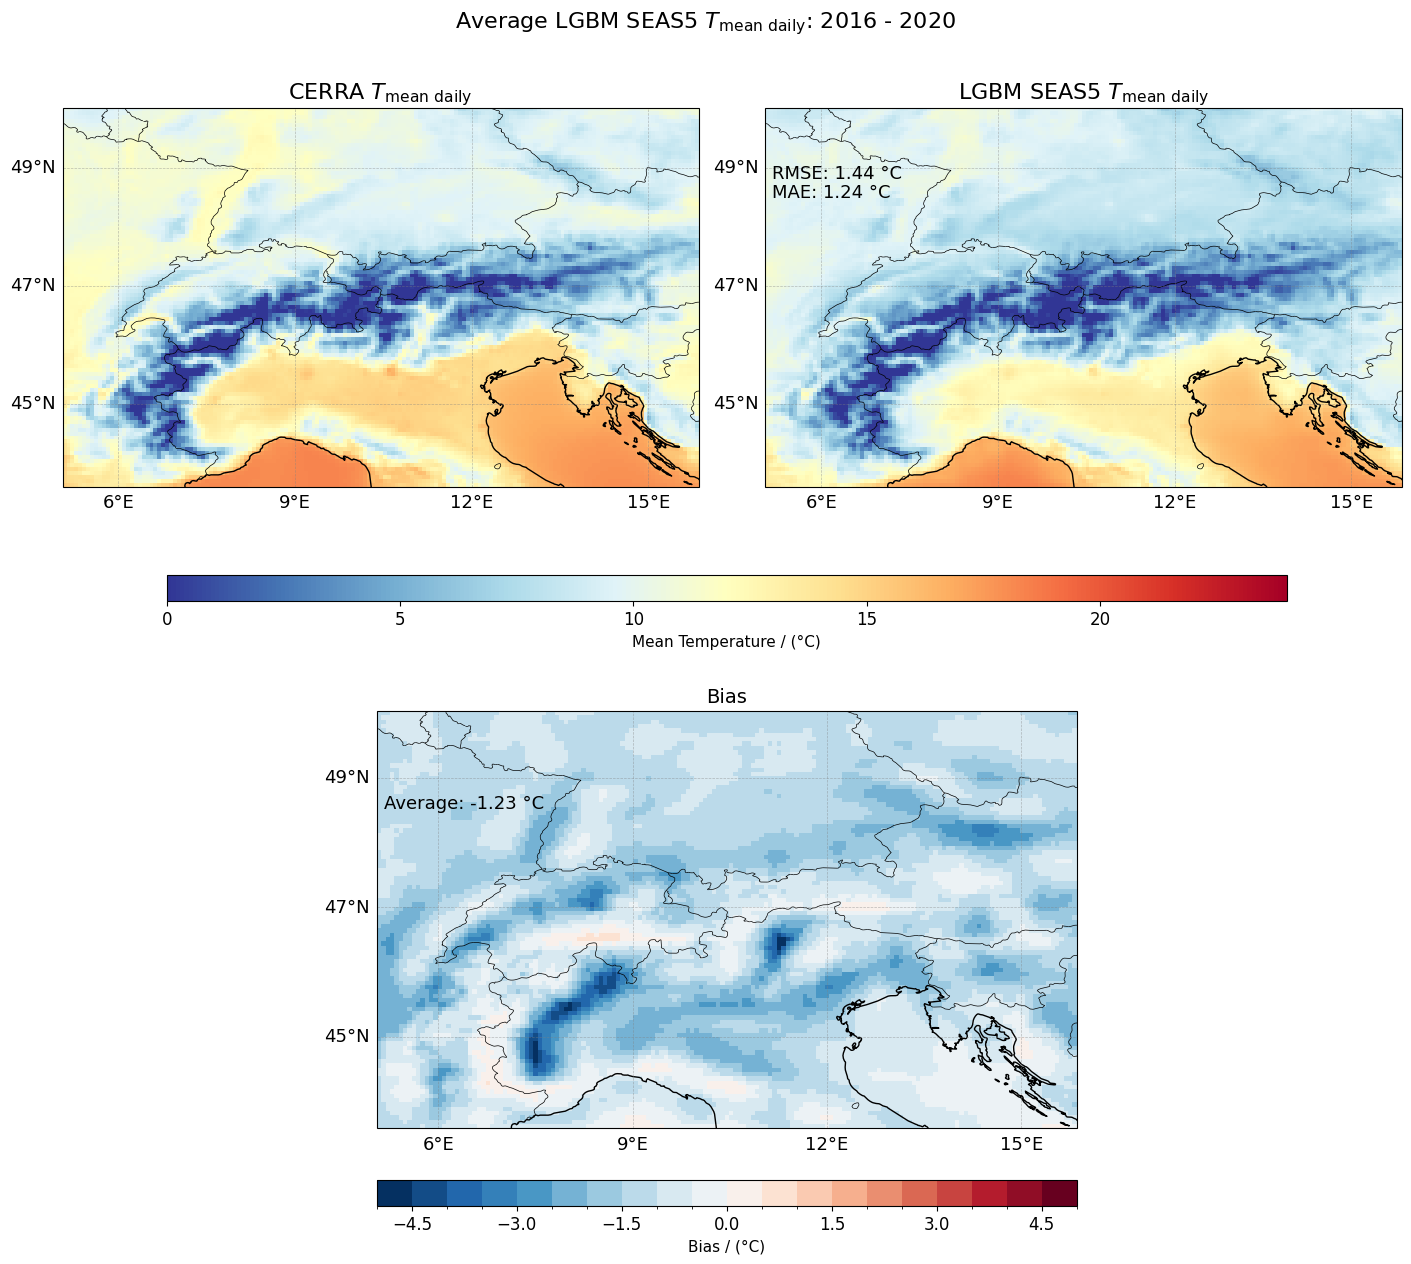

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm


# Assuming you have your bias_snl xarray dataarray object
# Set the CRS to EPSG 4326
ds_true_mean = y_true_yearly_avg.mean(dim="year")
ds_pred_mean = y_pred_yearly_avg.mean(dim="year")
ds_true_mean.rio.set_crs("EPSG:4326", inplace=True)
ds_pred_mean.rio.set_crs("EPSG:4326", inplace=True)
ds_true_mean = ds_true_mean.drop_vars("heightAboveGround")
bias = ds_pred_mean - ds_true_mean

# Add a new dimension named 'number' with values [0, 1, 2] to each data array
three = xr.concat([ds_true_mean, ds_pred_mean, bias], dim='number')

# Plot each number separately
numbers = [0, 1, 2]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 13), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

for i, number in enumerate(numbers):
    if i == 2:
        ax = axes[1, 0]  # Bias plot centered in the second row
        ax.set_position([0.265, 0.07, 0.5, 0.4])  # Adjust position to center
    else:
        ax = axes[i // 2, i % 2]  # Adjust row and column index
    
    
    # Select data for the current number
    ds_number = three.sel(number=number)
    
    # Plot the data
    if i == 2:
        #im = ds_number.plot(ax=ax, cmap='RdBu_r', vmin=-4, vmax=4, add_colorbar=False)
        levels = np.linspace(-5, 5, 21)  # 5% bins from -40 to 40
        norm = BoundaryNorm(levels, ncolors=256)
        im = ds_number.plot(ax=ax, cmap='RdBu_r', norm=norm, add_colorbar=False)
    else:
        img = ds_number.plot(ax=ax, cmap='RdYlBu_r', vmin=0, vmax=24, add_colorbar=False)
    
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='solid', edgecolor='black')
    
    # Add coastlines
    ax.coastlines()
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([6, 9, 12, 15])
    gl.ylocator = mticker.FixedLocator([45, 47, 49])
    gl.xlabel_style = {'size': 13}  # Adjust the font size as needed
    gl.ylabel_style = {'size': 13}
    

    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove y-axis ticks and labels
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    # Remove x-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticklabels([])
    
    # Set title
    if i == 0:
        ax.set_title(TRUE, fontsize=16)
    elif i == 1:
        ax.set_title(PRED, fontsize=16)
        ax.text(0.01, 0.85, "RMSE: {:.2f} °C".format(rmse_avg.item()), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')
        ax.text(0.01, 0.8, "MAE: {:.2f} °C".format(mae_avg.item()), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')
    elif i == 2:
        ax.set_title('Bias', fontsize=14)
        ax.text(0.01, 0.8, "Average: {:.2f} °C".format(ds_number.mean().item()), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')

fig.suptitle('Average {}: {} - {}'.format(PRED, start_year, end_year), fontsize=16, y=0.97);

# Create a common colorbar for bias
cbar_ax_bias = fig.add_axes([0.115, 0.515, 0.8, 0.02])  # Adjust height to fit properly
cbar_bias = fig.colorbar(img, cax=cbar_ax_bias, orientation='horizontal')
cbar_bias.set_label('Mean Temperature / (°C)', fontsize=11)
cbar_bias.ax.tick_params(labelsize=12)
# Hide the empty subplot
fig.delaxes(axes[1, 1])

# Add a separate colorbar for the second row plot
cbar_ax_second_row = fig.add_axes([0.265, 0.05, 0.5, 0.02])  # Adjust height to fit properly
cbar_second_row = fig.colorbar(im, cax=cbar_ax_second_row, orientation='horizontal')
cbar_second_row.set_label('Bias / (°C)', fontsize=11)  # Set your label
cbar_second_row.ax.tick_params(labelsize=12)
#cbar_second_row.set_ticks([your_ticks])  # Set your ticks
#cbar_second_row.set_ticklabels([your_tick_labels])  # Set your tick labels

plt.show()


# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_average_bias_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

In [29]:
print(bias.min().values, bias.max().values)

-5.143841105285205 0.9227547788106858


### Seasonal bias

Calculate seasonal bias:

In [30]:
# group data by season: (DJF, MAM, JJA, SON)
y_true_snl = y_true.groupby('time.season').mean(dim='time')
y_pred_snl = y_pred.groupby('time.season').mean(dim='time')
bias_snl = y_pred_snl - y_true_snl

In [31]:
# print average bias per season: Insitu:CERRA
for season in bias_snl.season:
    print('({}:{}) Average bias of mean {} for season {}: {:.1f}°C'.format(TRUE, PRED, PREDICTAND, season.item(), bias_snl.sel(season=season).mean().item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Average bias of mean tasmean for season DJF: -1.4°C
(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Average bias of mean tasmean for season JJA: -1.0°C
(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Average bias of mean tasmean for season MAM: -1.8°C
(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Average bias of mean tasmean for season SON: -0.7°C


Plot seasonal differences, taken from the [xarray documentation](xarray.pydata.org/en/stable/examples/monthly-means.html).

In [32]:
# print average bias per season: Insitu:CERRA
for season in bias_snl.season:
    print(bias_snl.sel(season=season).min().item(), bias_snl.sel(season=season).max().item())

-5.01604664149365 1.1717651945425036
-5.298921707058822 1.099958474011034
-6.5997206345637505 0.6307486200527306
-4.810871799847181 1.4276932478440556


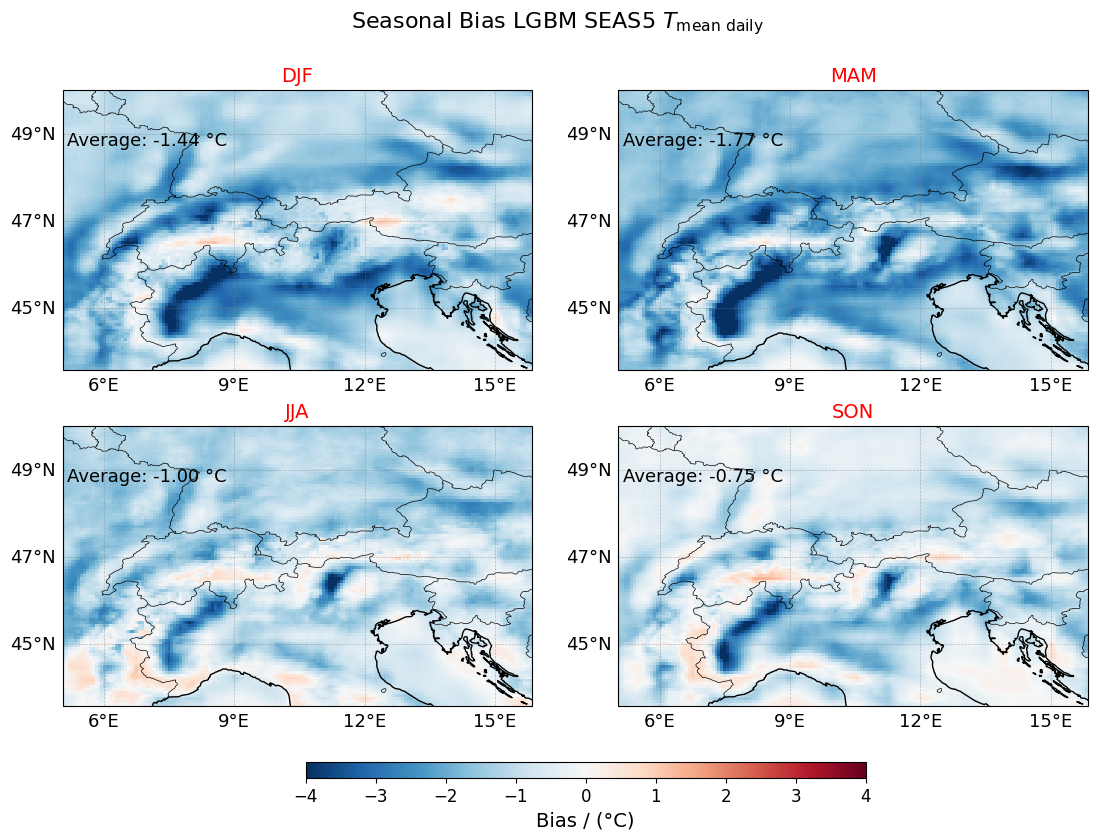

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.ticker as mticker

# Assuming you have your bias_snl xarray dataarray object
# Set the CRS to EPSG 4326
bias_snl.rio.set_crs("EPSG:4326", inplace=True)

# Plot each season separately
seasons = ['DJF', 'MAM', 'JJA', 'SON']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Select data for the current season
    ds_season = bias_snl.sel(season=season)
    
    # Plot the data
    im = ds_season.plot(ax=ax, cmap='RdBu_r', vmin=-4, vmax=4, add_colorbar=False)
    
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='solid', edgecolor='black')
    
    # Add coastlines
    ax.coastlines()
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([6, 9, 12, 15])
    gl.ylocator = mticker.FixedLocator([45, 47, 49])
    gl.xlabel_style = {'size': 13}  # Adjust the font size as needed
    gl.ylabel_style = {'size': 13}



    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove y-axis ticks and labels
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    # Remove y-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticklabels([])
    # Set title
    ax.set_title('{}'.format(season), fontsize=14, color="red")
    ax.text(0.01, 0.85, 'Average: {:.2f} °C'.format(ds_season.mean()), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')

fig.suptitle('Seasonal Bias {}'.format(PRED), fontsize=16);

# Add colorbar at the bottom
cbar_ax_predictand = fig.add_axes([0.32, 0.02, 0.4, 0.02])
cbar_predictand = fig.colorbar(im, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='Bias / (°C)', fontsize=14)
cbar_predictand.ax.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.05, hspace=0.2)  # Adjust spacing between subplots
plt.show()


# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_bias_seasonal_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

### Bias of extreme values

In [34]:
# extreme quantile of interest
quantile = 0.02 if PREDICTAND == 'tasmin' else 0.98

In [35]:
# calculate extreme quantile for each year
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    y_pred_ex = y_pred.groupby('time.year').quantile(quantile, dim='time')
    y_true_ex = y_true.groupby('time.year').quantile(quantile, dim='time')

In [36]:
# calculate bias in extreme quantile for each year
bias_ex = y_pred_ex - y_true_ex

In [37]:
# bias of extreme quantile: Insitu:CERRA
print('({}:{}) Yearly average bias for P{:.0f} of {}: {:.1f}°C'.format(TRUE, PRED, quantile * 100, PREDICTAND, bias_ex.mean().item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Yearly average bias for P98 of tasmean: -3.2°C


In [38]:
# mean absolute error in extreme quantile
mae_ex = np.abs(y_pred_ex - y_true_ex).mean()

In [39]:
# mae of extreme quantile: Insitu:CERRA
print('({}:{}) Yearly average MAE for P{:.0f} of {}: {:.1f}°C'.format(TRUE, PRED, quantile * 100, PREDICTAND, mae_ex.item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Yearly average MAE for P98 of tasmean: 3.2°C


In [40]:
# root mean squared error in extreme quantile
rmse_ex = np.sqrt(((y_pred_ex - y_true_ex) ** 2).mean())

In [41]:
# rmse of extreme quantile: Insitu:CERRA
print('({}:{}) Yearly average RMSE for P{:.0f} of {}: {:.1f}°C'.format(TRUE, PRED, quantile * 100, PREDICTAND, rmse_ex.item()))

(CERRA $T_{\mathrm{mean \ daily}}$:LGBM SEAS5 $T_{\mathrm{mean \ daily}}$) Yearly average RMSE for P98 of tasmean: 3.6°C


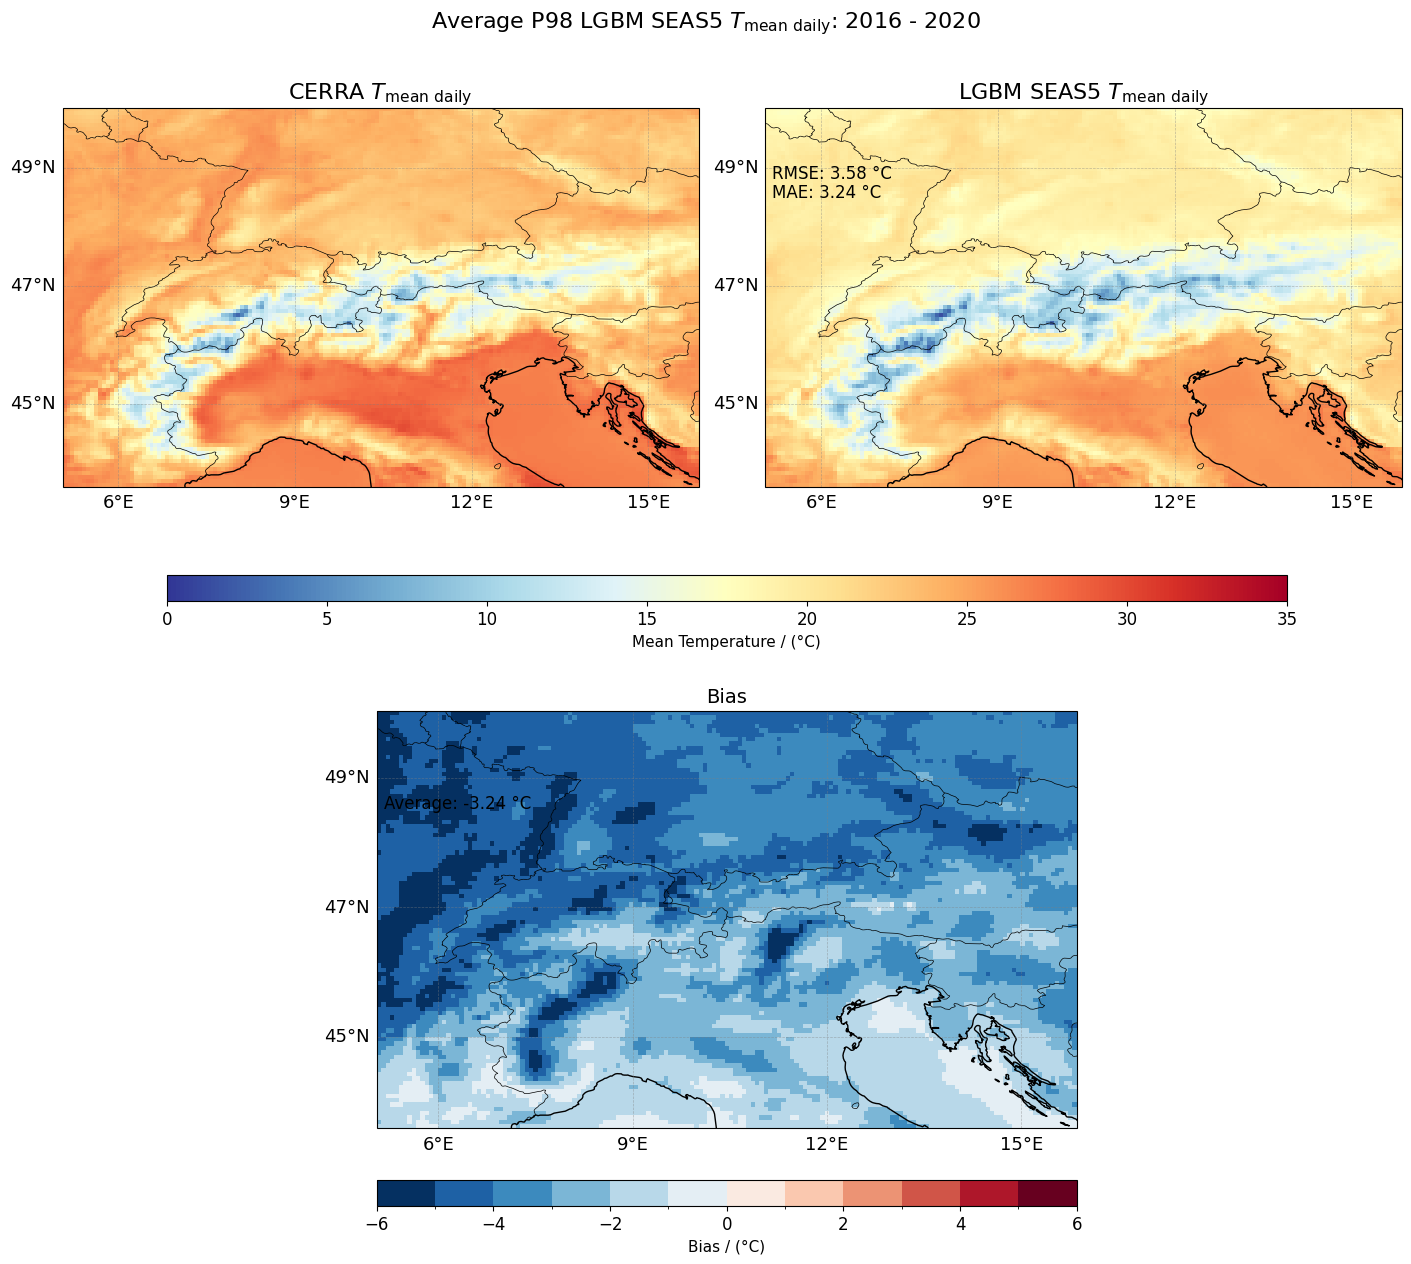

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.ticker as mticker

# Assuming you have your bias_snl xarray dataarray object
# Set the CRS to EPSG 4326
ds_true_ex = y_true_ex.mean(dim="year")
ds_pred_ex = y_pred_ex.mean(dim="year")
ds_true_ex.rio.set_crs("EPSG:4326", inplace=True)
ds_pred_ex.rio.set_crs("EPSG:4326", inplace=True)
#ds_true_ex = ds_true_ex.drop_vars("heightAboveGround")
bias_ex = ds_pred_ex - ds_true_ex

# Add a new dimension named 'number' with values [0, 1, 2] to each data array
ex = xr.concat([ds_true_ex, ds_pred_ex, bias_ex], dim='number')

# Plot each number separately
numbers = [0, 1, 2]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 13), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)

for i, number in enumerate(numbers):
    if i == 2:
        ax = axes[1, 0]  # Bias plot centered in the second row
        ax.set_position([0.265, 0.07, 0.5, 0.4])  # Adjust position to center
        
    else:
        ax = axes[i // 2, i % 2]  # Adjust row and column index
    
    
    # Select data for the current number
    ds_number = ex.sel(number=number)
    
    # Plot the data
    if i == 2:
        #im = ds_number.plot(ax=ax, cmap='RdBu_r', vmin=-6, vmax=6, add_colorbar=False)
        # Plot the data with a custom colormap and normalizing the color bar
        levels = np.linspace(-6, 6, 13)  # 5% bins from -40 to 40
        norm = BoundaryNorm(levels, ncolors=256)
        im = ds_number.plot(ax=ax, cmap='RdBu_r', norm=norm, add_colorbar=False)
    else:
        img = ds_number.plot(ax=ax, cmap='RdYlBu_r', vmin=0, vmax=35, add_colorbar=False)
    
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='solid', edgecolor='black')
    
    # Add coastlines
    ax.coastlines()
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([6, 9, 12, 15])
    gl.ylocator = mticker.FixedLocator([45, 47, 49])
    gl.xlabel_style = {'size': 13}  # Adjust the font size as needed
    gl.ylabel_style = {'size': 13}

    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove y-axis ticks and labels
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    # Remove x-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticklabels([])
    
    # Set title
    if i == 0:
        ax.set_title(TRUE, fontsize=16)
    elif i == 1:
        ax.set_title(PRED, fontsize=16)
        # Add text with RMSE and MAE values
        ax.text(0.01, 0.85, "RMSE: {:.2f} °C".format(rmse_ex.item()), ha='left', va='top', transform=ax.transAxes, fontsize=12, color='black')
        ax.text(0.01, 0.8, "MAE: {:.2f} °C".format(mae_ex.item()), ha='left', va='top', transform=ax.transAxes, fontsize=12, color='black')
    elif i == 2:
        ax.set_title('Bias', fontsize=14)
        ax.text(0.01, 0.8, "Average: {:.2f} °C".format(ds_number.mean().item()), ha='left', va='top', transform=ax.transAxes, fontsize=12, color='black')

fig.suptitle('Average P98 {}: {} - {}'.format(PRED, start_year, end_year), fontsize=16, y=0.97);

# Create a common colorbar for bias
cbar_ax_bias = fig.add_axes([0.115, 0.515, 0.8, 0.02])  # Adjust height to fit properly
cbar_bias = fig.colorbar(img, cax=cbar_ax_bias, orientation='horizontal')
cbar_bias.set_label('Mean Temperature / (°C)', fontsize=11)
cbar_bias.ax.tick_params(labelsize=12)
# Hide the empty subplot
fig.delaxes(axes[1, 1])

# Add a separate colorbar for the second row plot
cbar_ax_second_row = fig.add_axes([0.265, 0.05, 0.5, 0.02])  # Adjust height to fit properly
cbar_second_row = fig.colorbar(im, cax=cbar_ax_second_row, orientation='horizontal')
cbar_second_row.set_label('Bias / (°C)', fontsize=11)  # Set your label
cbar_second_row.ax.tick_params(labelsize=12)

plt.show()


# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_bias_p{:.0f}_sf.png'.format(PREDICTAND, quantile * 100), dpi=300, bbox_inches='tight')

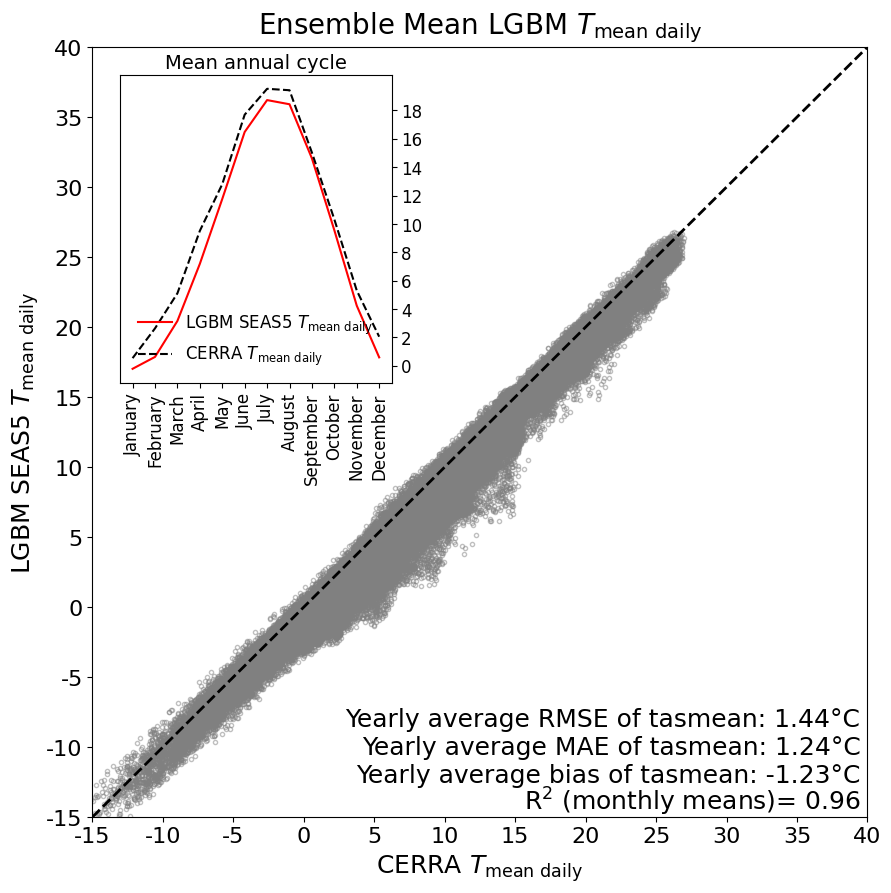

In [43]:
# scatter plot of observations vs. predictions
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# plot entire dataset
ax.plot(y_true_mv, y_pred_mv, 'o', alpha=.5, markeredgecolor='grey', markerfacecolor='none', markersize=3)

# plot 1:1 mapping line
if PREDICTAND == 'tasmin':
    interval = np.arange(-25, 30, 5)
else:
    interval = np.arange(-15, 45, 5)

ax.plot(interval, interval, color='k', lw=2, ls='--')

# add coefficients of determination
ax.text(interval[-1] - 0.5, interval[0] + 0.5, s='R$^2$ (monthly means)= {:.2f}'.format(r2_mm), ha='right', fontsize=18)
#ax.text(interval[-1] - 0.5, interval[0] + 2.5, s='R$^2$ (daily anomalies) = {:.2f}'.format(r2_anom), ha='right', fontsize=18)
ax.text(interval[-1] - 0.5, interval[0] + 2.5, s='Yearly average bias of {}: {:.2f}°C'.format(PREDICTAND, bias_yearly_avg.mean().item()), ha='right', fontsize=18)
ax.text(interval[-1] - 0.5, interval[0] + 4.5, s='Yearly average MAE of {}: {:.2f}°C'.format(PREDICTAND, mae_avg.mean().item()), ha='right', fontsize=18)
ax.text(interval[-1] - 0.5, interval[0] + 6.5, s='Yearly average RMSE of {}: {:.2f}°C'.format(PREDICTAND, rmse_avg.mean().item()), ha='right', fontsize=18)


# format axes
ax.set_ylim(interval[0], interval[-1])
ax.set_xlim(interval[0], interval[-1])
ax.set_xticks(interval)
ax.set_xticklabels(interval, fontsize=16)
ax.set_yticks(interval)
ax.set_yticklabels(interval, fontsize=16)
ax.set_xlabel(TRUE, fontsize=18)
ax.set_ylabel(PRED, fontsize=18)
ax.set_title('Ensemble Mean {}'.format(str("LGBM $T_{\mathrm{mean \ daily}}$")), fontsize=20, pad=10);

# add axis for annual cycle
axins = inset_axes(ax, width="35%", height="40%", loc=2, borderpad=2)
axins.plot(y_pred_ac.values, ls='-', color='r', label=PRED)
axins.plot(y_true_ac.values, ls='--', color='k', label=TRUE)
axins.legend(frameon=False, fontsize=12, loc='lower center');
axins.yaxis.tick_right()
axins.set_yticks(np.arange(-10, 11, 2) if PREDICTAND == 'tasmin' else np.arange(0, 20, 2))
axins.set_yticklabels(np.arange(-10, 11, 2) if PREDICTAND == 'tasmin' else np.arange(0, 20, 2), fontsize=12)
axins.set_xticks(np.arange(0, 12))
axins.set_xticklabels([calendar.month_name[i + 1] for i in np.arange(0, 12)], rotation=90, fontsize=12)
axins.set_title('Mean annual cycle', fontsize=14, pad=5);

plt.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/Annual_cycle_sf.png', dpi=300, bbox_inches='tight')


Seasonal CRPS

In [44]:
import numpy as np
import xarray as xr
import xskillscore as xs
import matplotlib.pyplot as plt

hindcast = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_hindcast.nc")
hindcast = hindcast.rename({'number': "member"})
forecast = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_forecast.nc")

hindcast = hindcast - 273.15
forecast = forecast - 273.15

hindcast_true = y_true.sel(time=hindcast.time)
forecast_true = y_true.sel(time=forecast.time)

hindcast_crps = xs.crps_ensemble(hindcast_true, hindcast, dim=[])
forecast_crps = xs.crps_ensemble(forecast_true, forecast, dim=[])

crps_ensemble = xr.concat([hindcast_crps, forecast_crps], dim='time')

bias_snl = crps_ensemble.groupby('time.season').mean(dim='time')
bias_snl = bias_snl.drop_vars("heightAboveGround")
bias_snl = bias_snl.tasmean

# print average bias per season: Insitu:CERRA
for season in bias_snl.season:
    print(bias_snl.sel(season=season).min().item(), bias_snl.sel(season=season).max().item())

1.0064177030435824 3.923889763172748
0.7309765914510413 4.1319143575296575
0.7287146833614093 5.228364689309059
0.9247530381780266 3.953682519891891


In [46]:
crps_ensemble.to_netcdf("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/CRPS_downscaled_SEAS5.nc")

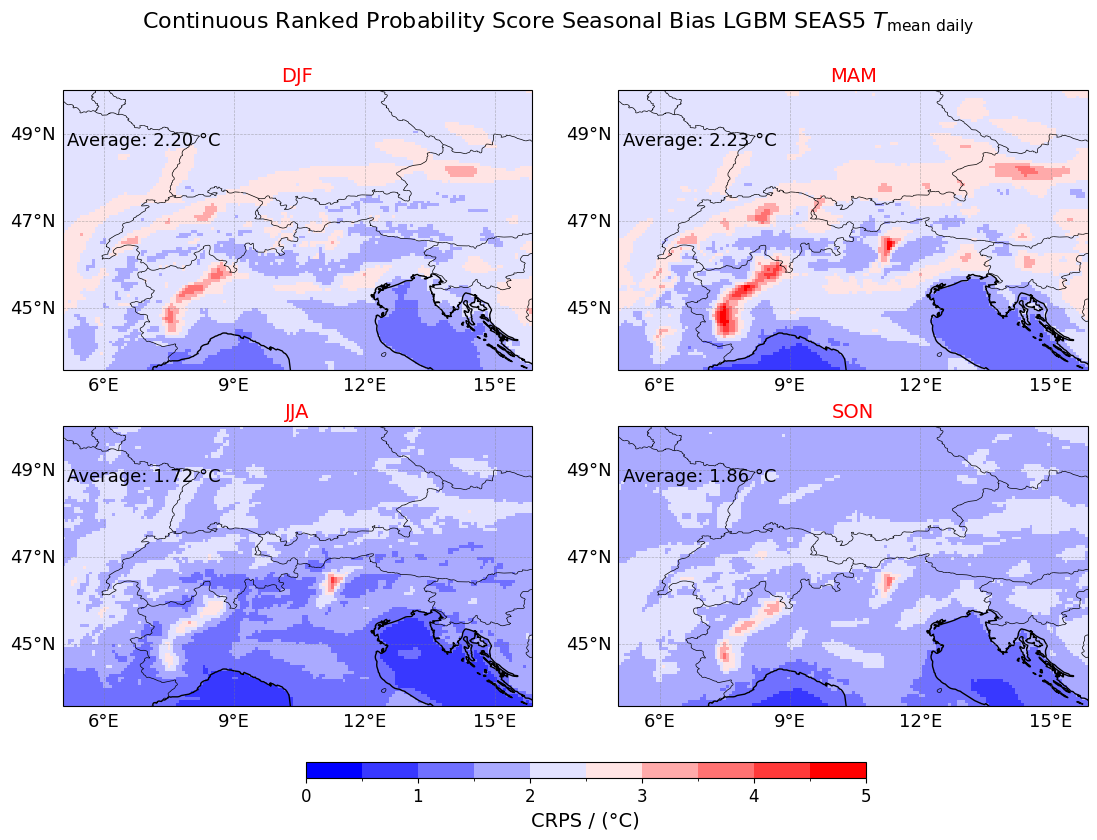

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.ticker as mticker

# Assuming you have your bias_snl xarray dataarray object
# Set the CRS to EPSG 4326
bias_snl.rio.set_crs("EPSG:4326", inplace=True)

# Plot each season separately
seasons = ['DJF', 'MAM', 'JJA', 'SON']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Select data for the current season
    ds_season = bias_snl.sel(season=season)
    
    # Plot the data
    #im = ds_season.plot(ax=ax, cmap='bwr', vmin=0, vmax=5, add_colorbar=False)
    levels = np.linspace(0, 5, 11)  # 5% bins from -40 to 40
    norm = BoundaryNorm(levels, ncolors=256)
    im = ds_season.plot(ax=ax, cmap='bwr', norm=norm, add_colorbar=False)
    
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='solid', edgecolor='black')
    
    # Add coastlines
    ax.coastlines()
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([6, 9, 12, 15])
    gl.ylocator = mticker.FixedLocator([45, 47, 49])
    gl.xlabel_style = {'size': 13}  # Adjust the font size as needed
    gl.ylabel_style = {'size': 13}



    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove y-axis ticks and labels
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    # Remove y-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticklabels([])
    # Set title
    ax.set_title('{}'.format(season), fontsize=14, color="red")
    ax.text(0.01, 0.85, 'Average: {:.2f} °C'.format(ds_season.mean()), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')

fig.suptitle('Continuous Ranked Probability Score Seasonal Bias {}'.format(PRED), fontsize=16);

# Add colorbar at the bottom
cbar_ax_predictand = fig.add_axes([0.32, 0.02, 0.4, 0.02])
cbar_predictand = fig.colorbar(im, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='CRPS / (°C)', fontsize=14)
cbar_predictand.ax.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.05, hspace=0.2)  # Adjust spacing between subplots
plt.show()


# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_crps_seasonal_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

Spread to Error Ratio

In [64]:
import xarray as xr
import numpy as np

def calculate_error(ref_ds, ens_ds):
    # Calculate error using mean squared error (MSE) between reference dataset and ensemble forecast dataset
    error = ((ref_ds - ens_ds.mean(dim='member'))**2).mean(dim=['x', 'y', 'time'])
    return error

def calculate_spread(ens_ds):
    # Calculate spread using standard deviation across ensemble members
    spread = ens_ds.std(dim='member')
    return spread

def calculate_se_ratio(ref_ds, ens_ds):
    # Calculate error
    error = calculate_error(ref_ds, ens_ds)
    
    # Calculate spread
    spread = calculate_spread(ens_ds)
    
    # Compute S/E ratio
    se_ratio = spread / error
    
    return se_ratio

# Example usage:
# Assuming you have ref_ds as the reference dataset and ens_ds as the ensemble forecast dataset

# Calculate spread-to-error ratio
se_ratio = calculate_se_ratio(hindcast_true, hindcast)

# Print or analyze the result
print(se_ratio)

bias_snl = se_ratio.groupby('time.season').mean(dim='time')
bias_snl = bias_snl.drop_vars("heightAboveGround")
bias_snl = bias_snl.tasmean


<xarray.Dataset> Size: 45MB
Dimensions:            (time: 366, y: 96, x: 161)
Coordinates:
  * time               (time) datetime64[ns] 3kB 2016-02-01 ... 2017-01-31
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
    heightAboveGround  float64 8B ...
Data variables:
    tasmean            (time, y, x) float64 45MB 0.2137 0.2249 ... 0.4597 0.4714


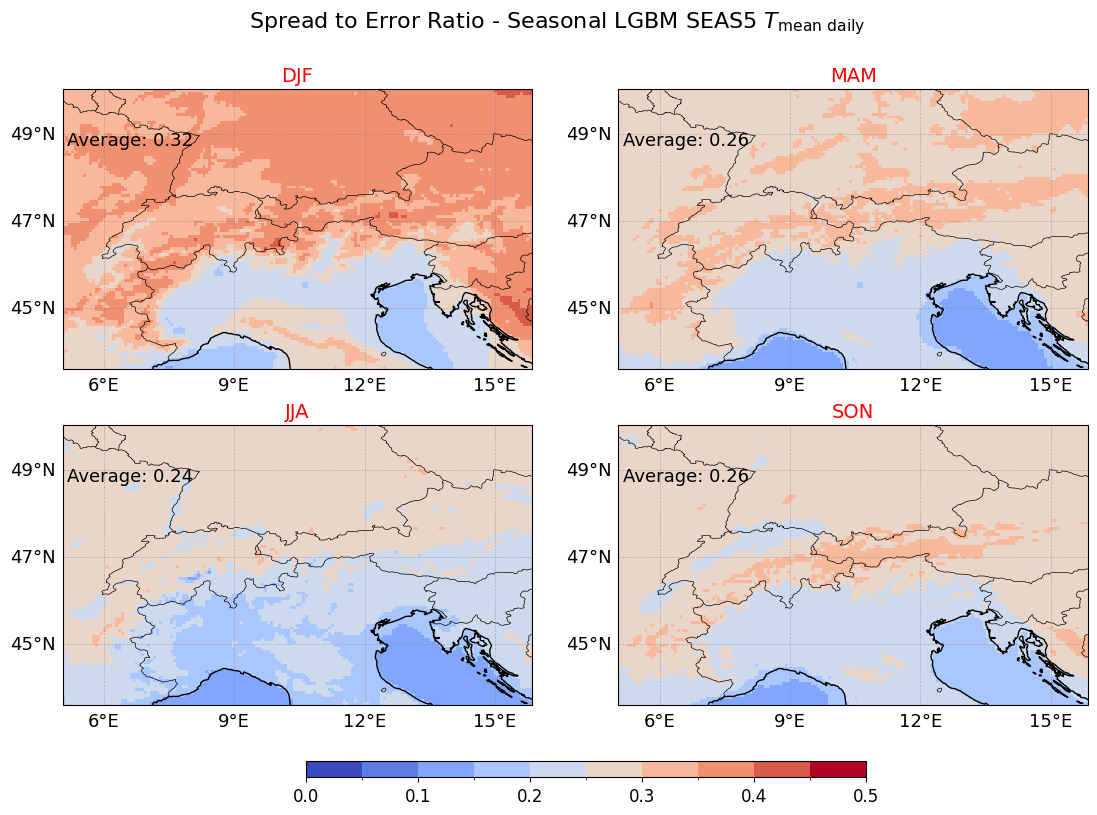

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.ticker as mticker

# Assuming you have your bias_snl xarray dataarray object
# Set the CRS to EPSG 4326
bias_snl.rio.set_crs("EPSG:4326", inplace=True)

# Plot each season separately
seasons = ['DJF', 'MAM', 'JJA', 'SON']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Select data for the current season
    ds_season = bias_snl.sel(season=season)
    
    # Plot the data
    #im = ds_season.plot(ax=ax, cmap='bwr', vmin=0, vmax=5, add_colorbar=False)
    levels = np.linspace(0, 0.5, 11)  # 5% bins from -40 to 40
    norm = BoundaryNorm(levels, ncolors=256)
    im = ds_season.plot(ax=ax, cmap='coolwarm', norm=norm, add_colorbar=False)
    
    # Add country borders
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle='solid', edgecolor='black')
    
    # Add coastlines
    ax.coastlines()
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([6, 9, 12, 15])
    gl.ylocator = mticker.FixedLocator([45, 47, 49])
    gl.xlabel_style = {'size': 13}  # Adjust the font size as needed
    gl.ylabel_style = {'size': 13}



    # Remove x-axis and y-axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove y-axis ticks and labels
    ax.yaxis.set_ticks([])
    ax.yaxis.set_ticklabels([])

    # Remove y-axis ticks and labels
    ax.xaxis.set_ticks([])
    ax.xaxis.set_ticklabels([])
    # Set title
    ax.set_title('{}'.format(season), fontsize=14, color="red")
    ax.text(0.01, 0.85, 'Average: {:.2f} '.format(ds_season.mean()), ha='left', va='top', transform=ax.transAxes, fontsize=13, color='black')

fig.suptitle('Spread to Error Ratio - Seasonal {}'.format(PRED), fontsize=16);

# Add colorbar at the bottom
cbar_ax_predictand = fig.add_axes([0.32, 0.02, 0.4, 0.02])
cbar_predictand = fig.colorbar(im, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='', fontsize=14)
cbar_predictand.ax.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.05, hspace=0.2)  # Adjust spacing between subplots
plt.show()

